In [1]:
import pandas as pd
import mysql.connector
import json
from sqlalchemy import create_engine
from urllib.parse import quote_plus

In [2]:
import numpy as np
import pandas as pd
import ast

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset_path = 'tmdb_5000_movies.csv'
credits = "tmdb_5000_credits.csv"

In [5]:
# Connect to MySQL server
conn = mysql.connector.connect(
        host='localhost',
        user='root',
        password='Saadhvir@28!',  
        database='dbms'
)

cursor = conn.cursor()

# Create database if not exists
cursor.execute(f"CREATE DATABASE IF NOT EXISTS dbms")
conn.commit()

In [6]:
def insert_data_into_db(df, batch_size=100, max_retries=3):

    # Create table if not exists
    cursor.execute("""CREATE TABLE IF NOT EXISTS datasetfordbms (
        budget INT,
        genres VARCHAR(1500),
        homepage VARCHAR(1500),
        id INT,
        keywords VARCHAR(5000),
        original_language VARCHAR(255),
        original_title VARCHAR(255),
        overview VARCHAR(1500),
        popularity FLOAT(8,2),
        production_companies VARCHAR(2500),
        production_countries VARCHAR(1500),
        release_date VARCHAR(255),
        revenue BIGINT,
        runtime FLOAT(8,2),
        spoken_languages VARCHAR(1000),
        status VARCHAR(255),
        tagline VARCHAR(255),
        title VARCHAR(255),
        vote_average FLOAT(8,2),
        vote_count INT)
    """)

    try:
            # Convert object dtype columns to JSON serialized strings
        object_columns = df.select_dtypes(include=['object']).columns.tolist()
        for column in object_columns:
            df[column] = df[column].apply(json.dumps)

        # Split data into batches for insertion
        data_batches = [df[i:i+batch_size] for i in range(0, len(df), batch_size)]

        for batch in data_batches:
            # Impute missing values within the loop for each batch
            imputed_batch = batch.fillna(method='ffill') 

            # Use column names and values from the current batch
            columns = ', '.join(imputed_batch.columns)
            values = imputed_batch.values.tolist()
            placeholders = ', '.join(['%s'] * len(imputed_batch.columns))
            insert_query = f"INSERT INTO datasetfordbms, ({columns}) VALUES ({placeholders})"

            cursor.executemany(insert_query, values)
            conn.commit()

        print("Data insertion successful!")

    except mysql.connector.Error as err:
        print(f"Error: {err}")

    finally:
        if cursor:
            cursor.close()
        if conn:
            conn.close()

In [7]:
# Read data from CSV file
df = pd.read_csv(dataset_path)

In [8]:
# Insert data into MySQL database
insert_data_into_db(df)

Error: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near ', (budget, genres, homepage, id, keywords, original_language, original_title, ov' at line 1


In [9]:
# Connect to MySQL server
conn = mysql.connector.connect(
        host='localhost',
        user='root',
        password='Saadhvir@28!',  
        database='dbms'
)

cursor = conn.cursor()

# Create database if not exists
cursor.execute(f"CREATE DATABASE IF NOT EXISTS dbms")
conn.commit()

In [10]:
def insert_credit_into_db(df_1, batch_size=100, max_retries=3):

    cursor = conn.cursor()
    
    # Create table if not exists
    cursor.execute("""CREATE TABLE IF NOT EXISTS creditsfordbms (
        movie_id INT,
        title VARCHAR(255),
        cast MEDIUMTEXT,
        crew MEDIUMTEXT
        )
    """)

    try:
        # Convert object dtype columns to JSON serialized strings
        object_columns = df.select_dtypes(include=['object']).columns.tolist()
        for column in object_columns:
            df[column] = df[column].apply(json.dumps)

        # Split data into batches for insertion
        data_batches = [df[i:i+batch_size] for i in range(0, len(df), batch_size)]

        for batch in data_batches:
            # Impute missing values within the loop for each batch
            imputed_batch = batch.fillna(method='ffill') 

            # Use column names and values from the current batch
            columns = ', '.join(imputed_batch.columns)
            values = imputed_batch.values.tolist()
            placeholders = ', '.join(['%s'] * len(imputed_batch.columns))
            insert_query = f"INSERT INTO creditsfordbms, ({columns}) VALUES ({placeholders})"

            cursor.executemany(insert_query, values)
            conn.commit()

        print("Data insertion successful!")

    except mysql.connector.Error as err:
        print(f"Error: {err}")

    finally:
        if cursor:
            cursor.close()
        if conn:
            conn.close()

In [11]:
# Read data from CSV file
df_1 = pd.read_csv(credits)

In [12]:
# Insert data into MySQL database
insert_credit_into_db(df_1)

Error: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near ', (budget, genres, homepage, id, keywords, original_language, original_title, ov' at line 1


In [13]:
movie= pd.read_csv("tmdb_5000_movies.csv")
credit=pd.read_csv("tmdb_5000_credits.csv")

In [14]:
# Read data from MySQL database
try:
    db_uri = f"mysql+mysqlconnector://root:{quote_plus('Saadhvir@28!')}@localhost/dbms"
    engine = create_engine(db_uri)
    query = "SELECT * FROM datasetfordbms"
    query1 = "SELECT * FROM creditsfordbms"
    movies = pd.read_sql(query, engine)
    print(movies.head()) 
    credits = pd.read_sql(query1,engine)
    print(credits.head())
except mysql.connector.Error as err:
    print(f"Error: {err}")

      budget                                             genres  \
0  237000000  "[{\"id\": 28, \"name\": \"Action\"}, {\"id\":...   
1  300000000  "[{\"id\": 12, \"name\": \"Adventure\"}, {\"id...   
2  245000000  "[{\"id\": 28, \"name\": \"Action\"}, {\"id\":...   
3  250000000  "[{\"id\": 28, \"name\": \"Action\"}, {\"id\":...   
4  260000000  "[{\"id\": 28, \"name\": \"Action\"}, {\"id\":...   

                                         homepage      id  \
0                   "http://www.avatarmovie.com/"   19995   
1  "http://disney.go.com/disneypictures/pirates/"     285   
2   "http://www.sonypictures.com/movies/spectre/"  206647   
3            "http://www.thedarkknightrises.com/"   49026   
4          "http://movies.disney.com/john-carter"   49529   

                                            keywords original_language  \
0  "[{\"id\": 1463, \"name\": \"culture clash\"},...              "en"   
1  "[{\"id\": 270, \"name\": \"ocean\"}, {\"id\":...              "en"   
2  "[{\"

In [15]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [16]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [17]:
movie.shape

(4803, 20)

In [18]:
credit.shape

(4803, 4)

In [19]:
dataframe=pd.DataFrame(movie)
pd.set_option('display.max_columns',None)
print(dataframe)

         budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.

In [20]:
movie=movie.merge(credit,on="title")
movie.shape
#we merge the two datasets with the common column-title

(4809, 23)

In [21]:
movie

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come 

In [22]:
movie=movie[['movie_id','genres','keywords','title','cast','crew','overview']]

In [23]:
movie.head()
#updated movie table with only the needed columns

,movie_id,genres,keywords,title,cast,crew,overview
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","In the 22nd century, a paraplegic Marine is di..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","Captain Barbossa, long believed to be dead, ha..."
2,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",A cryptic message from Bond’s past sends him o...
3,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Following the death of District Attorney Harve...
4,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","John Carter is a war-weary, former military ca..."


In [24]:
movie.isnull().sum()
#check for null values

movie_id    0
genres      0
keywords    0
title       0
cast        0
crew        0
overview    3
dtype: int64

In [25]:
movie.dropna(inplace=True)
#remove empty rows

In [26]:
movie.duplicated().sum()
#check for duplicate values

0

In [27]:
movie.iloc[0].genres
#we see the data is in the form of list of dictionaries

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [28]:
#for genres column
def conv(obj):
    list=[]
    for i in ast.literal_eval(obj):
        #we convert string of lists to list using ast
        list.append(i['name'])
    return list

#for cast column
def conv3(obj):
    list=[]
    count=0
    for i in ast.literal_eval(obj):
        if count!=4:
            list.append(i['name'])
            count+=1
    return list

#for crew column
def fetch_d(obj):
    l=[]
    for i in ast.literal_eval(obj):
        if (i['job']== 'Director'):
            l.append(i['name'])
    return l

In [29]:
#movie.iloc[0].cast

In [30]:
#movie.iloc[0].crew

In [31]:
movie['genres']=movie['genres'].apply(conv)
#convert genres columns
movie.head()

,movie_id,genres,keywords,title,cast,crew,overview
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","In the 22nd century, a paraplegic Marine is di..."
1,285,"[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","Captain Barbossa, long believed to be dead, ha..."
2,206647,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",A cryptic message from Bond’s past sends him o...
3,49026,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Following the death of District Attorney Harve...
4,49529,"[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","John Carter is a war-weary, former military ca..."


In [32]:
movie['keywords']=movie['keywords'].apply(conv)
#convert keywords columns
movie.head()

,movie_id,genres,keywords,title,cast,crew,overview
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","In the 22nd century, a paraplegic Marine is di..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","Captain Barbossa, long believed to be dead, ha..."
2,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",A cryptic message from Bond’s past sends him o...
3,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Following the death of District Attorney Harve...
4,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","John Carter is a war-weary, former military ca..."


In [33]:
movie['cast']=movie['cast'].apply(conv3)
#convert cast columns
movie.head()

,movie_id,genres,keywords,title,cast,crew,overview
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","In the 22nd century, a paraplegic Marine is di..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","Captain Barbossa, long believed to be dead, ha..."
2,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",A cryptic message from Bond’s past sends him o...
3,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Following the death of District Attorney Harve...
4,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","John Carter is a war-weary, former military ca..."


In [34]:
movie['crew']=movie['crew'].apply(fetch_d)
#convert crew columns
movie.head()

,movie_id,genres,keywords,title,cast,crew,overview
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"In the 22nd century, a paraplegic Marine is di..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],"Captain Barbossa, long believed to be dead, ha..."
2,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],A cryptic message from Bond’s past sends him o...
3,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],Following the death of District Attorney Harve...
4,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],"John Carter is a war-weary, former military ca..."


In [35]:
#converting paragraph words to single words in list
movie['overview']=movie['overview'].apply(lambda x: x.split(" "))
movie.head()

,movie_id,genres,keywords,title,cast,crew,overview
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],"[Following, the, death, of, District, Attorney..."
4,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [36]:
#remove space in each column values
movie['cast']=movie['cast'].apply(lambda x:[i.replace(' ','') for i in x])
movie['genres']=movie['genres'].apply(lambda x:[i.replace(' ','') for i in x])
movie['keywords']=movie['keywords'].apply(lambda x:[i.replace(' ','') for i in x])
movie['crew']=movie['crew'].apply(lambda x:[i.replace(' ','') for i in x])
movie['overview']=movie['overview'].apply(lambda x:[i.replace(' ','') for i in x])

In [37]:
movie.head()

,movie_id,genres,keywords,title,cast,crew,overview
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...",The Dark Knight Rises,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...",John Carter,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [38]:
#create new column label with all attributes/tags
movie['label']=movie['genres']+movie['keywords']+movie['cast']+movie['crew']+movie['overview']
movie['label']

0       [Action, Adventure, Fantasy, ScienceFiction, c...
1       [Adventure, Fantasy, Action, ocean, drugabuse,...
2       [Action, Adventure, Crime, spy, basedonnovel, ...
3       [Action, Crime, Drama, Thriller, dccomics, cri...
4       [Action, Adventure, ScienceFiction, basedonnov...
                              ...                        
4804    [Action, Crime, Thriller, unitedstates–mexicob...
4805    [Comedy, Romance, EdwardBurns, KerryBishé, Mar...
4806    [Comedy, Drama, Romance, TVMovie, date, loveat...
4807    [DanielHenney, ElizaCoupe, BillPaxton, AlanRuc...
4808    [Documentary, obsession, camcorder, crush, dre...
Name: label, Length: 4806, dtype: object

In [39]:
dataframe=movie[['movie_id','title','label']]
print(dataframe)

      movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4804      9367                               El Mariachi   
4805     72766                                 Newlyweds   
4806    231617                 Signed, Sealed, Delivered   
4807    126186                          Shanghai Calling   
4808     25975                         My Date with Drew   

                                                  label  
0     [Action, Adventure, Fantasy, ScienceFiction, c...  
1     [Adventure, Fantasy, Action, ocean, drugabuse,...  
2     [Action, Adventure, Crime, spy, basedonnovel, ...  
3     [Action, Crime, Drama, Thriller, dccomics

In [40]:
#converting list to string
dataframe['label']=dataframe['label'].apply(lambda x:" ".join(x))
dataframe.head()

,movie_id,title,label
0,19995,Avatar,Action Adventure Fantasy ScienceFiction cultur...
1,285,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drugabuse exoti...
2,206647,Spectre,Action Adventure Crime spy basedonnovel secret...
3,49026,The Dark Knight Rises,Action Crime Drama Thriller dccomics crimefigh...
4,49529,John Carter,Action Adventure ScienceFiction basedonnovel m...


In [41]:
dataframe['label']=dataframe['label'].apply(lambda x:x.lower())
dataframe.head()

,movie_id,title,label
0,19995,Avatar,action adventure fantasy sciencefiction cultur...
1,285,Pirates of the Caribbean: At World's End,adventure fantasy action ocean drugabuse exoti...
2,206647,Spectre,action adventure crime spy basedonnovel secret...
3,49026,The Dark Knight Rises,action crime drama thriller dccomics crimefigh...
4,49529,John Carter,action adventure sciencefiction basedonnovel m...


In [42]:
#convert text to vectors with 5000 vectors and exclude stop words like a,an,the.. etc
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=5000,stop_words='english')

In [43]:
vectors= cv.fit_transform(dataframe['label']).toarray()

In [44]:
#get the features or words 
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [45]:
from imdb_api import IMDb 

imdb = IMDb()

In [46]:
import requests
from bs4 import BeautifulSoup

# Example: Scraping IMDb's Top 250 Movies
url = "https://www.imdb.com/chart/top"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract movie titles
    titles = [title.text.strip() for title in soup.select('.titleColumn a')]

    # Extract movie ratings
    ratings = [rating.text.strip() for rating in soup.select('.imdbRating strong')]

    # Print the extracted data
    for title, rating in zip(titles, ratings):
        print(title, rating)
else:
    print("Failed to fetch data. Status code:", response.status_code)


Failed to fetch data. Status code: 403


In [47]:
import requests
from bs4 import BeautifulSoup

url = "https://www.imdb.com/chart/top"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    # Extract and print data...
else:
    print("Failed to fetch data. Status code:", response.status_code)


In [48]:
import nltk

In [49]:
#we use porter stemmer algorithm here to remove the suffixes from words so that same words with diff tenses can be combined
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [50]:
#helper function

def st(obj):
    l=[]
    for i in obj.split():
        l.append(ps.stem(i))
    return " ".join(l)

In [51]:
dataframe['label']=dataframe['label'].apply(st)

In [52]:
dataframe['label'][0]

'action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav stephenlang jamescameron in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization.'

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

In [54]:
simi= cosine_similarity(vectors)

In [55]:
def recommend(movie):
    movie_index= dataframe[dataframe['title']== movie].index[0]
    dist=simi[movie_index]
    movies_list=sorted(list(enumerate(dist)),reverse=True,key=lambda x:x[1])[1:6]

    for i in movies_list:
        print(df.iloc[i[0]].title)
        

In [56]:
recommend('Kung Fu Panda')

"\"Kung Fu Panda 2\""
"\"Kung Fu Panda 3\""
"\"10 Days in a Madhouse\""
"\"Once Upon a Time in Mexico\""
"\"The Forbidden Kingdom\""


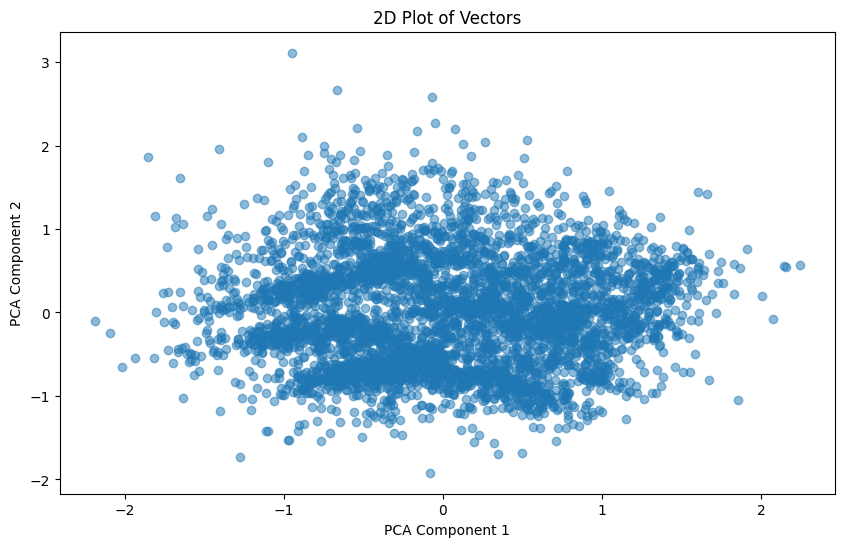

In [57]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dimensionality of vectors to 2 dimensions
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plot the vectors
plt.figure(figsize=(10, 6))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.5)
plt.title('2D Plot of Vectors')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [59]:
from tmdbv3api import TMDb
from tmdbv3api import Movie

# Set your TMDB API key
TMDB_API_KEY = "ead8f17c4665a0c7e8fc395fc377968b"

# Initialize the TMDB API
tmdb = TMDb()
tmdb.api_key = TMDB_API_KEY

# Function to get movie details from TMDB
def get_movie_details(movie_id):
    try:
        movie = Movie()
        response = movie.details(movie_id)
        if response:
            return response
        else:
            print("Failed to fetch movie details.")
            return None
    except Exception as e:
        print("An error occurred while fetching movie details:", e)
        return None

# Function to recommend movies
def recommend2(movie):
    movie_index = df[df['title'] == movie].index[0]
    dist = simi[movie_index]
    movies_list = sorted(list(enumerate(dist)), reverse=True, key=lambda x: x[1])[1:6]

    for i in movies_list:
        movie_title = df.iloc[i[0]].title
        movie_id = df.iloc[i[0]].movie_id
        movie_details = get_movie_details(movie_id)
        if movie_details:
            print("Title:", movie_title)
            print("Overview:", movie_details['overview'])
            print("Poster URL:", "https://image.tmdb.org/t/p/original" + movie_details['poster_path'])
            print("----")

# Example usage
recommend('Kung Fu Panda')

"\"Kung Fu Panda 2\""
"\"Kung Fu Panda 3\""
"\"10 Days in a Madhouse\""
"\"Once Upon a Time in Mexico\""
"\"The Forbidden Kingdom\""
